In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from shapely.geometry import LineString, MultiLineString
import osmnx as ox

In [28]:

roads = gpd.read_file("Roads/Roads.shp")  # or "roads.geojson"
print(roads.head())


   OBJECTID              NAME ALTNAME BLOCK                  Location_n  \
0         1      CAMPBELL AVE    None   400       400 Blk Campbell Ave.   
1         2      WESTMOUNT DR    None   100       100 Blk Westmount Dr.   
2         3     BROOKFIELD RD    None   200      200 Blk Brookfield Rd.   
3         4     BROOKFIELD RD    None   100      100 Blk Brookfield Rd.   
4         5  WILLIAMS GLEN RD    None   100  100 Blk Williams Glenn Rd.   

       Fromstreet             ToStreet  TOTALANES  DIRECT1  \
0     N TAYLOR PL                  END          2  Two-way   
1  FALL VIEW TERR                  END          2  Two-way   
2    FALLVIEW TER         CAMPBELL AVE          2  Two-way   
3        CLIFF ST        FALLVIEW TERR          2  Two-way   
4        CLIFF ST  TOWN OF ITHACA LINE          2  Two-way   

                              SIDEWLK1  ...  SHOULDTEXT  RESPONSERO  OWNTYPE  \
0  No sidewalks adjacent to the street  ...  Vegetation          NO   CITYST   
1  No sidewalks 

C:\Users\logan\AppData\Local\Temp\ipykernel_4640\1922574117.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])
C:\Users\logan\AppData\Local\Temp\ipykernel_4640\1575723434.py:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


<Axes: >

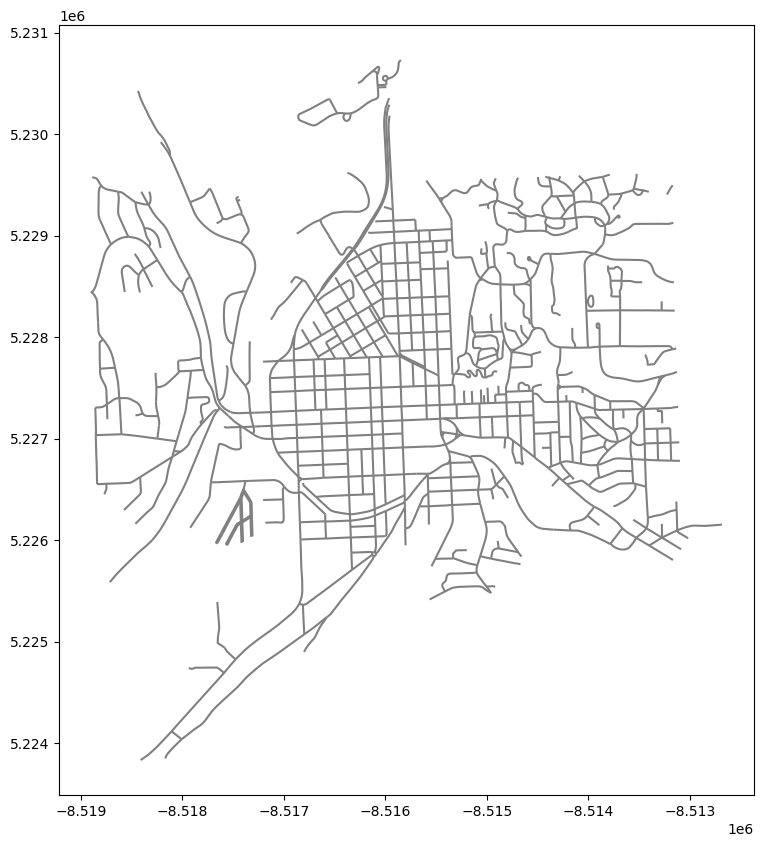

In [4]:
roads.plot(figsize=(10, 10), color="gray")

In [7]:

G = nx.Graph()

for _, row in roads.iterrows():
    geom = row.geometry

    # Handle MultiLineString vs LineString
    if isinstance(geom, LineString):
        lines = [geom]
    elif isinstance(geom, MultiLineString):
        lines = list(geom.geoms)
    else:
        continue  # skip if geometry isn't a line

    # Add edges for each LineString
    for line in lines:
        coords = list(line.coords)
        for i in range(len(coords) - 1):
            p1, p2 = coords[i], coords[i + 1]
            G.add_edge(p1, p2, length=line.length)


KeyboardInterrupt: 

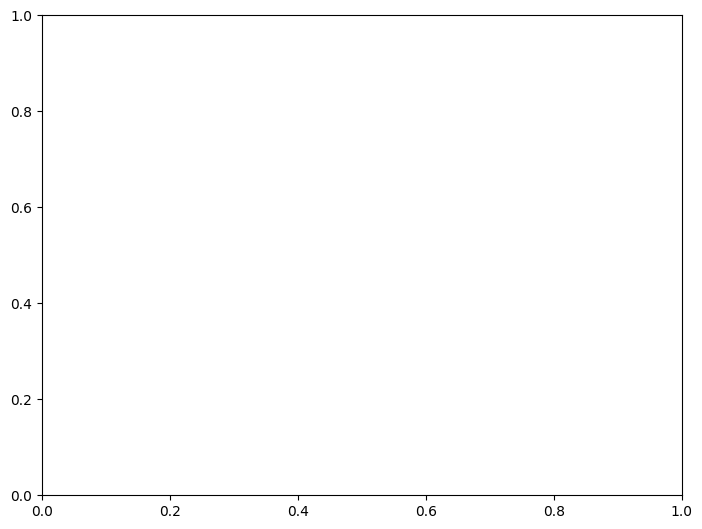

In [8]:
nx.draw(G, with_labels=False, node_color='skyblue', node_size=1)
plt.title("My NetworkX Graph")
plt.axis('off') # Turn off the axis
plt.show()

In [9]:
print(G.nodes())

[(-8518294.60540494, 5228494.96206872), (-8518376.62213005, 5228657.17688506), (-8518382.71525366, 5228673.16270518), (-8518211.33678226, 5228879.5797441), (-8518215.91989799, 5228887.65620943), (-8518218.67136437, 5228897.12857951), (-8518230.2581123, 5228951.941186), (-8518232.36565512, 5228960.7403778), (-8518236.01757414, 5228972.90452671), (-8518240.23769005, 5228983.69777975), (-8518244.12459421, 5228991.77380339), (-8518252.33840207, 5229005.88209425), (-8518258.46785943, 5229014.60660992), (-8518269.82751726, 5229027.99272797), (-8518274.97929726, 5229034.02547017), (-8518278.84352923, 5229038.01329586), (-8518291.77782204, 5229048.65762796), (-8518302.80679848, 5229055.93685625), (-8518314.53245676, 5229062.51787713), (-8518326.87836244, 5229067.05509536), (-8518339.63714858, 5229070.89402555), (-8518347.39644129, 5229072.11591602), (-8518353.55777666, 5229072.68967517), (-8518359.71948258, 5229072.56485482), (-8518365.80389419, 5229072.46564613), (-8518374.54289166, 5229073.6

C:\Users\logan\AppData\Local\Temp\ipykernel_29140\609483048.py:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(x, y)


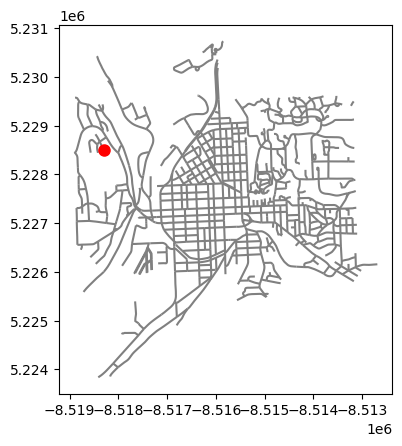

KeyboardInterrupt: 

In [10]:
import time
plt.ion()
fig, ax = plt.subplots()
roads.plot(ax=ax, color="gray")
car, = ax.plot([], [], 'ro', markersize=8)

for x, y in G.nodes():
    car.set_data(x, y)
    plt.pause(0.01)  # pause to simulate motion
plt.show()


In [12]:
G = ox.graph_from_place("Ithaca, New York, USA", network_type="drive")
# G = ox.simplify_graph(G)

In [14]:
sp = nx.shortest_path(G,(-8518294.60540494, 5228494.96206872),(-8518326.12187435, 5229433.92773774))

NodeNotFound: Either source (-8518294.60540494, 5228494.96206872) or target (-8518326.12187435, 5229433.92773774) is not in G

KeyError: 0

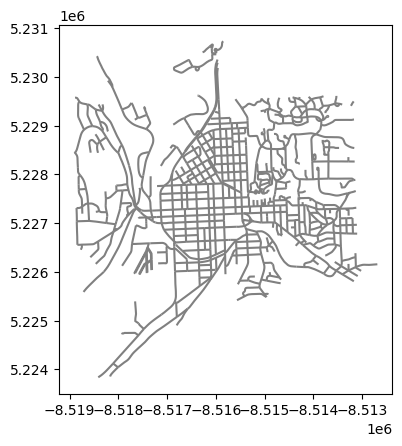

In [13]:
from matplotlib.animation import FuncAnimation
# import osmnx as ox

# G = ox.simplify_graph(G)
fig, ax = plt.subplots()
roads.plot(ax=ax, color="gray")
car, = ax.plot([], [], 'ro', markersize=3)
route = G.nodes()
def update(frame):
    x, y = route[frame]
    car.set_data(x, y)
    return car,

anim = FuncAnimation(fig, update, frames=len(route), interval=50, blit=True)
plt.show()


Using largest component with 6777 nodes
Graph built: 6777 nodes, 7020 edges
Finding shortest path...
Path length: 226 nodes


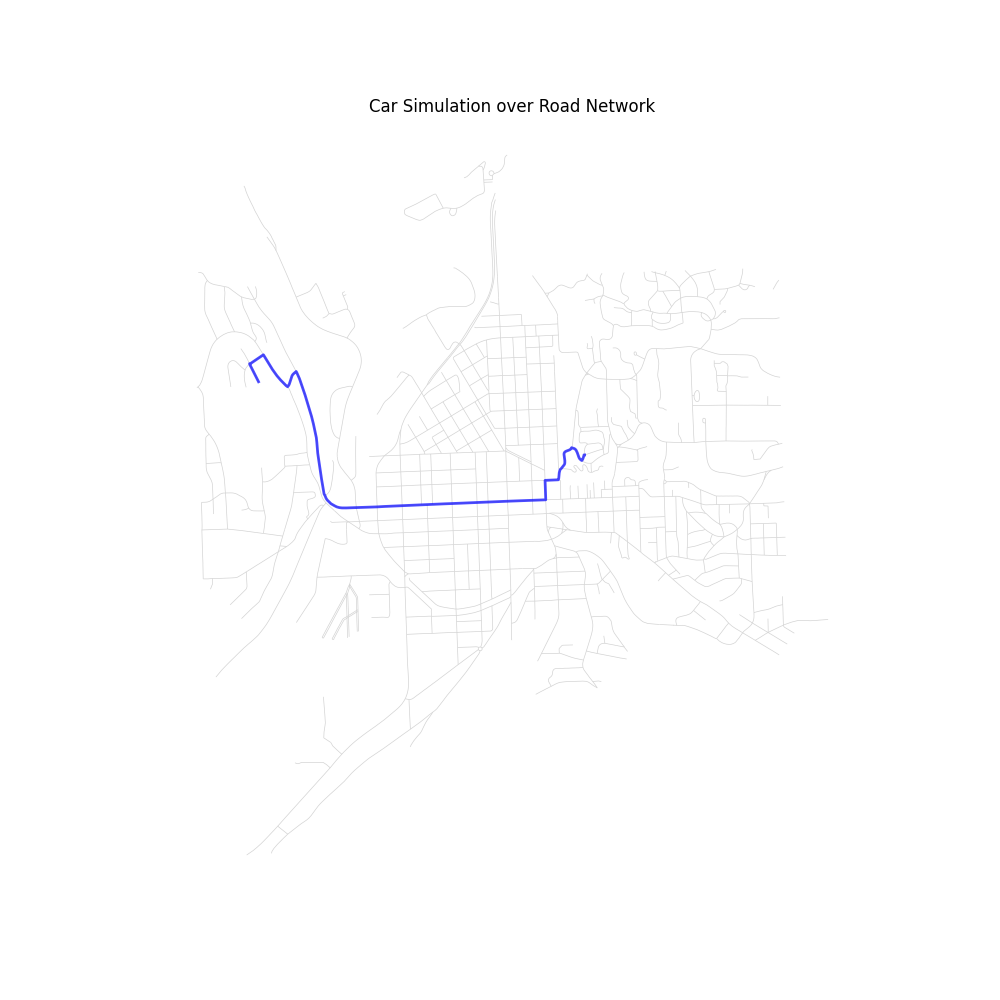

In [8]:
import geopandas as gpd
import networkx as nx
%matplotlib widget
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
from matplotlib.animation import FuncAnimation
import osmnx as ox

# =======================
# 1. Load the road data
# =======================
roads = gpd.read_file("Roads/Roads.shp")  # or "roads.geojson"
roads = roads.to_crs(epsg=4326)     # ensure lat/lon coordinates

# =======================
# 2. Build a NetworkX graph
# =======================
G = nx.Graph()

for _, row in roads.iterrows():
    geom = row.geometry
    if isinstance(geom, LineString):
        lines = [geom]
    elif isinstance(geom, MultiLineString):
        lines = list(geom.geoms)
    else:
        continue
    
    for line in lines:
        coords = list(line.coords)
        for i in range(len(coords) - 1):
            p1, p2 = coords[i], coords[i+1]
            dist = Point(p1).distance(Point(p2))
            G.add_edge(p1, p2, length=dist)
largest_component = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_component).copy()
print(f"Using largest component with {len(G.nodes)} nodes")
# G = ox.graph_from_place("Ithaca, New York, USA", network_type="drive")

print(f"Graph built: {len(G.nodes)} nodes, {len(G.edges)} edges")

# =======================
# 3. Pick start & end nodes
# =======================
# Pick arbitrary nodes for demo – replace with your own
nodes = list(G.nodes)
start = nodes[0]
end = nodes[len(nodes)//2]
end = nodes[-1]

# Compute shortest path by road length
print("Finding shortest path...")
route = nx.shortest_path(G, source=start, target=end, weight="length")
print(f"Path length: {len(route)} nodes")

# =======================
# 4. Plot the map background
# =======================
fig, ax = plt.subplots(figsize=(10, 10))
roads.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set_title("Car Simulation over Road Network")
ax.set_axis_off()

# Extract route coordinates
xs, ys = zip(*route)
ax.plot(xs, ys, color="blue", linewidth=2, alpha=0.7)  # route line

# =======================
# 5. Animate the car
# =======================
car, = ax.plot([], [], 'ro', markersize=8)

def update(frame):
    car.set_data(xs[frame], ys[frame])
    return car,

anim = FuncAnimation(fig, update, frames=len(xs), interval=50, blit=True)

plt.show()


In [5]:
import math

def turn_angle(p1, p2, p3):
    """Compute turning angle in radians at vertex p2 formed by p1->p2->p3"""
    v1 = (p1[0] - p2[0], p1[1] - p2[1])
    v2 = (p3[0] - p2[0], p3[1] - p2[1])
    dot = v1[0]*v2[0] + v1[1]*v2[1]
    mag1 = math.hypot(*v1)
    mag2 = math.hypot(*v2)
    cosang = max(-1, min(1, dot / (mag1 * mag2)))
    return math.acos(cosang)


C:\Users\logan\AppData\Local\Temp\ipykernel_29900\3533154232.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])
C:\Users\logan\AppData\Local\Temp\ipykernel_29900\1922574117.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


In [10]:
from networkx.algorithms.euler import eulerian_circuit

cpp_route = list(eulerian_circuit(G))
print(f"CPP route covers {len(cpp_route)} edges")


C:\Users\logan\AppData\Local\Temp\ipykernel_29900\3533154232.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])
C:\Users\logan\AppData\Local\Temp\ipykernel_29900\1922574117.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


NetworkXError: G is not Eulerian.

In [11]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
import math
import random

# ----------------------------
# Utility functions
# ----------------------------

def build_graph(roads):
    """Convert GeoDataFrame of LineStrings/MultiLineStrings into a NetworkX graph."""
    G = nx.Graph()
    for _, row in roads.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            lines = [geom]
        elif isinstance(geom, MultiLineString):
            lines = geom.geoms
        else:
            continue
        for line in lines:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                u, v = coords[i], coords[i+1]
                dist = Point(u).distance(Point(v))
                G.add_edge(u, v, length=dist, covered=False)
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component).copy()
    print(f"Using largest component with {len(G.nodes)} nodes")
    return G


def nearest_uncovered_edge(G, current):
    print("Finding uncovered edges")
    uncovered = [(u, v) for u, v, d in G.edges(data=True) if not d["covered"]]
    print("This ended")
    if not uncovered:
        return None, None
    min_dist, best_edge = float("inf"), None
    print(len(uncovered))
    for u, v in uncovered:
        try:
            d1 = nx.shortest_path_length(G, current, u, weight="length")
            d2 = nx.shortest_path_length(G, current, v, weight="length")
        except nx.NetworkXNoPath:
            continue  # skip disconnected edges
        d = min(d1, d2)
        if d < min_dist:
            min_dist, best_edge = d, (u, v)
    return best_edge, min_dist


def greedy_cover_path(G, start):
    """Traverse the graph covering all edges at least once using a greedy approach."""
    print("Greedy")
    path = [start]
    current = start
    while True:
        edge, dist = nearest_uncovered_edge(G, current)
        if edge is None:
            break
        target = edge[0] if nx.shortest_path_length(G, current, edge[0]) < nx.shortest_path_length(G, current, edge[1]) else edge[1]
        subpath = nx.shortest_path(G, current, target, weight="length")
        path.extend(subpath[1:])
        G[edge[0]][edge[1]]["covered"] = True
        current = target
        print(path)
    return path


def partition_route(path, G, n_vehicles):
    """Partition path into n roughly equal-length segments."""
    total_len = 0
    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]
        if G.has_edge(u, v):
            total_len += G[u][v]['length']
    target_len = total_len / n_vehicles

    routes, curr_route, dist_accum = [[]], 0
    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]
        if G.has_edge(u, v):
            edge_len = G[u][v]['length']
            if dist_accum + edge_len > target_len and len(routes) < n_vehicles:
                routes.append([])
                dist_accum = 0
            routes[-1].append((u, v))
            dist_accum += edge_len
    return routes


def plot_routes(roads, routes):
    """Visualize road network and color each vehicle's route."""
    fig, ax = plt.subplots(figsize=(10, 10))
    roads.plot(ax=ax, color="lightgray", linewidth=0.5)
    colors = plt.cm.get_cmap('tab20', len(routes))
    for i, route in enumerate(routes):
        for (u, v) in route:
            xs, ys = zip(u, v)
            ax.plot(xs, ys, color=colors(i), linewidth=2)
    ax.set_axis_off()
    plt.show()


# ----------------------------
# Main heuristic runner
# ----------------------------

def run_coverage(road_file, n_vehicles=12):
    roads = gpd.read_file(road_file)
    roads = roads.to_crs(epsg=4326)
    # Keep only public drivable roads (if road type info exists)
    roads = roads[~roads["OWNERSHIP"].isin(["PRIVATE", "CU"])]
    # Or drop short dead-ends
    # roads = roads[roads.length > 5]  # meters
    G = build_graph(roads)

    # Pick a random start node (or set manually)
    start = random.choice(list(G.nodes))
    print(f"Starting at {start}")

    # Build greedy traversal path
    path = greedy_cover_path(G, start)
    print(f"Traversal length: {len(path)} nodes")

    # Partition among vehicles
    routes = partition_route(path, G, n_vehicles)
    print(f"Created {len(routes)} vehicle routes")

    # Visualize
    plot_routes(roads, routes)

    return G, routes

if __name__ == "__main__":
    # Example usage
    run_coverage("Roads/Roads.shp", n_vehicles=12)


Using largest component with 6033 nodes
Starting at (-76.48970279634977, 42.45396118641169)
Greedy
Finding uncovered edges
This ended
6263
[(-76.48970279634977, 42.45396118641169)]
Finding uncovered edges
This ended
6262
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\logan\AppData\Local\Temp\ipykernel_4640\182407979.py", line 140, in <module>
    run_coverage("Roads/Roads.shp", n_vehicles=12)
  File "C:\Users\logan\AppData\Local\Temp\ipykernel_4640\182407979.py", line 126, in run_coverage
    path = greedy_cover_path(G, start)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\logan\AppData\Local\Temp\ipykernel_4640\182407979.py", line 61, in greedy_cover_path
    edge, dist = nearest_uncovered_edge(G, current)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\logan\AppData\Local\Temp\ipykernel_4640\182407979.py", line 46, in nearest_uncovered_edge
    d2 = nx.shortest_path_length(G, current, v, weight="length")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

📂 Loading roads...
✅ Roads loaded: 776 segments
🔗 Building graph...
✅ Graph built: 6033 nodes, 6263 edges (largest component)
🚘 Clustering and traversing...
✅ Generated 8 routes
🗺️ Plotting routes...


C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2406631639.py:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(routes))


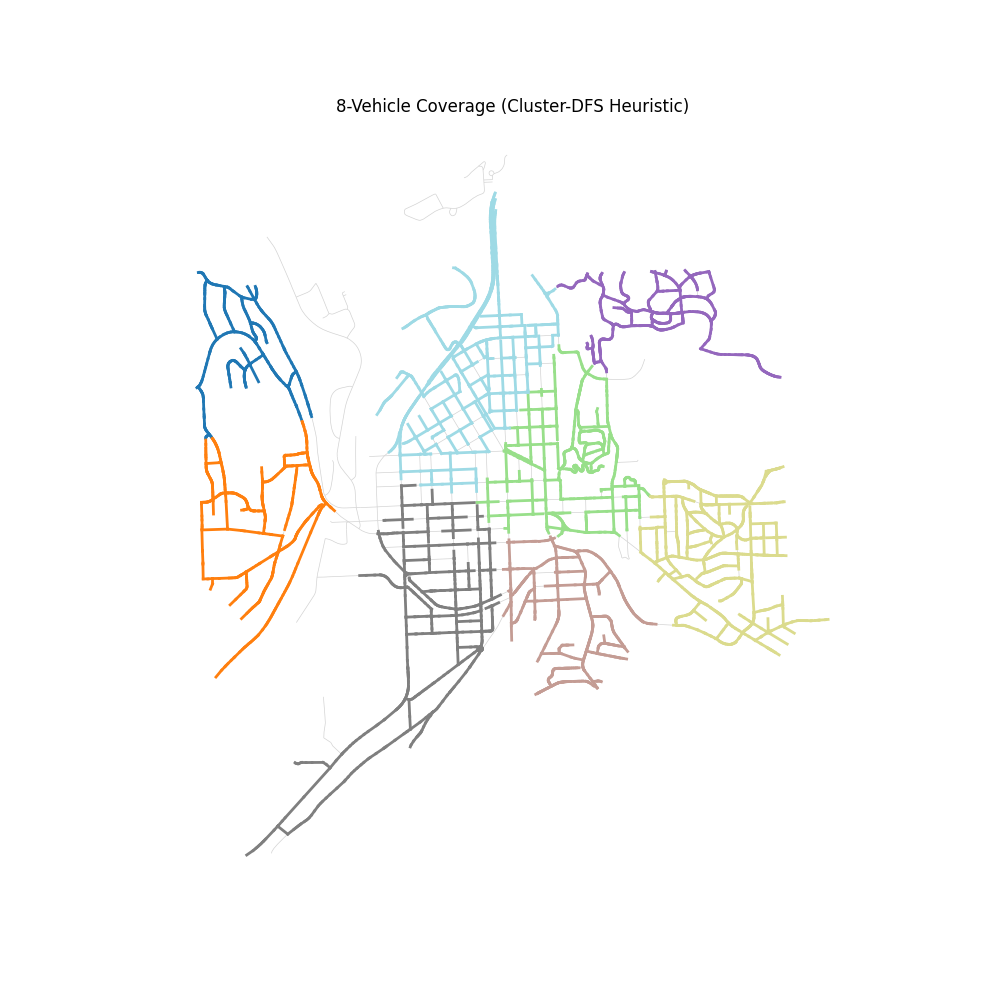

In [16]:
"""
Fast Multi-Vehicle Road Coverage Heuristic
Author: Logan Abramowitz & ChatGPT
Description:
  Clusters a road network spatially, covers each cluster via DFS traversal,
  and assigns up to N vehicles to cover all public roads efficiently.
"""

import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# =====================================================
# 1. BUILD GRAPH FROM SHAPEFILE
# =====================================================

def build_graph(roads):
    """Convert GeoDataFrame of LineStrings/MultiLineStrings into a NetworkX graph."""
    G = nx.Graph()
    for _, row in roads.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            lines = [geom]
        elif isinstance(geom, MultiLineString):
            lines = geom.geoms
        else:
            continue
        for line in lines:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                u, v = coords[i], coords[i + 1]
                dist = Point(u).distance(Point(v))
                if dist > 0:
                    G.add_edge(u, v, length=dist)
    # largest_component = max(nx.connected_components(G), key=len)
    # G = G.subgraph(largest_component).copy()
    # print(f"Using largest component with {len(G.nodes)} nodes")
    return G


# =====================================================
# 2. FILTER & SIMPLIFY ROADS
# =====================================================

def preprocess_roads(roads):
    roads = roads[~roads["OWNERSHIP"].isin(["PRIVATE", "CU"])]

    # """Remove private or service roads and simplify geometry."""
    # keep_cols = [c.lower() for c in roads.columns]

    # # Remove known private types if column exists
    # for col in keep_cols:
    #     if any(k in col for k in ["type", "class", "access"]):
    #         roads = roads[~roads[col].astype(str).str.contains("private|service|driveway", case=False)]
    #         break

    # # Drop super-short edges (<5 m)
    # if "geometry" in roads.columns:
    #     roads = roads[roads.length > 5]
    # print(len(roads[roads.length < 5]))
    return roads


# =====================================================
# 3. CLUSTER NODES AND RUN LOCAL DFS PER CLUSTER
# =====================================================

def cluster_and_cover(G, n_clusters=12):
    """Cluster spatially and generate DFS edge list per cluster."""
    coords = np.array([[x, y] for x, y in G.nodes])
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    labels = kmeans.fit_predict(coords)

    clusters = {}
    for node, label in zip(G.nodes, labels):
        clusters.setdefault(label, []).append(node)

    routes = []
    for i, nodes in clusters.items():
        subG = G.subgraph(nodes).copy()
        if not nx.is_connected(subG):
            subG = max((subG.subgraph(c) for c in nx.connected_components(subG)), key=len)
        start = next(iter(subG.nodes))
        route_edges = list(nx.dfs_edges(subG, source=start))
        routes.append(route_edges)
    return routes, labels


# =====================================================
# 4. VISUALIZATION
# =====================================================

def plot_routes(roads, routes):
    """Plot roads and color each route."""
    fig, ax = plt.subplots(figsize=(10, 10))
    roads.plot(ax=ax, color="lightgray", linewidth=0.5)
    cmap = plt.cm.get_cmap("tab20", len(routes))
    for i, route in enumerate(routes):
        for (u, v) in route:
            xs, ys = zip(u, v)
            ax.plot(xs, ys, color=cmap(i), linewidth=2)
    ax.set_axis_off()
    plt.title(f"{len(routes)}-Vehicle Coverage (Cluster-DFS Heuristic)")
    plt.show()


def plot_clusters(G, labels):
    """Visualize clustering only (optional)."""
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = plt.cm.get_cmap("tab20", len(set(labels)))
    for (x, y), label in zip(G.nodes, labels):
        ax.plot(x, y, "o", color=cmap(label), markersize=1.2)
    plt.title("Spatial Clusters for Vehicle Coverage")
    plt.axis("equal")
    plt.show()


# =====================================================
# 5. MAIN PIPELINE
# =====================================================

def run_fast_coverage(road_file, n_vehicles=12):
    """Run the full heuristic pipeline on the shapefile."""
    print("📂 Loading roads...")
    roads = gpd.read_file(road_file)
    roads = roads.to_crs(epsg=4326)
    roads = preprocess_roads(roads)
    print(f"✅ Roads loaded: {len(roads)} segments")

    print("🔗 Building graph...")
    G = build_graph(roads)
    G = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)
    print(f"✅ Graph built: {len(G.nodes)} nodes, {len(G.edges)} edges (largest component)")

    print("🚘 Clustering and traversing...")
    routes, labels = cluster_and_cover(G, n_clusters=n_vehicles)
    print(f"✅ Generated {len(routes)} routes")

    print("🗺️ Plotting routes...")
    plot_routes(roads, routes)
    # plot_clusters(G, labels)  # uncomment for cluster view

    return G, routes


# =====================================================
# 6. EXAMPLE USAGE
# =====================================================

if __name__ == "__main__":
    # Replace with your shapefile path
    run_fast_coverage("Roads/Roads.shp", n_vehicles=8)


📂 Loading roads...
✅ Roads after filtering: 868 segments
🔗 Building graph...
✅ Graph built: 6777 nodes, 7020 edges (largest component)
🚘 Clustering & turn-aware coverage...
✅ Generated 23 routes (some clusters may have multiple components)
🧮 Edge coverage: 6948/7020 edges traversed at least once
🗺️ Plotting routes...


C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2908493616.py:253: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(routes))


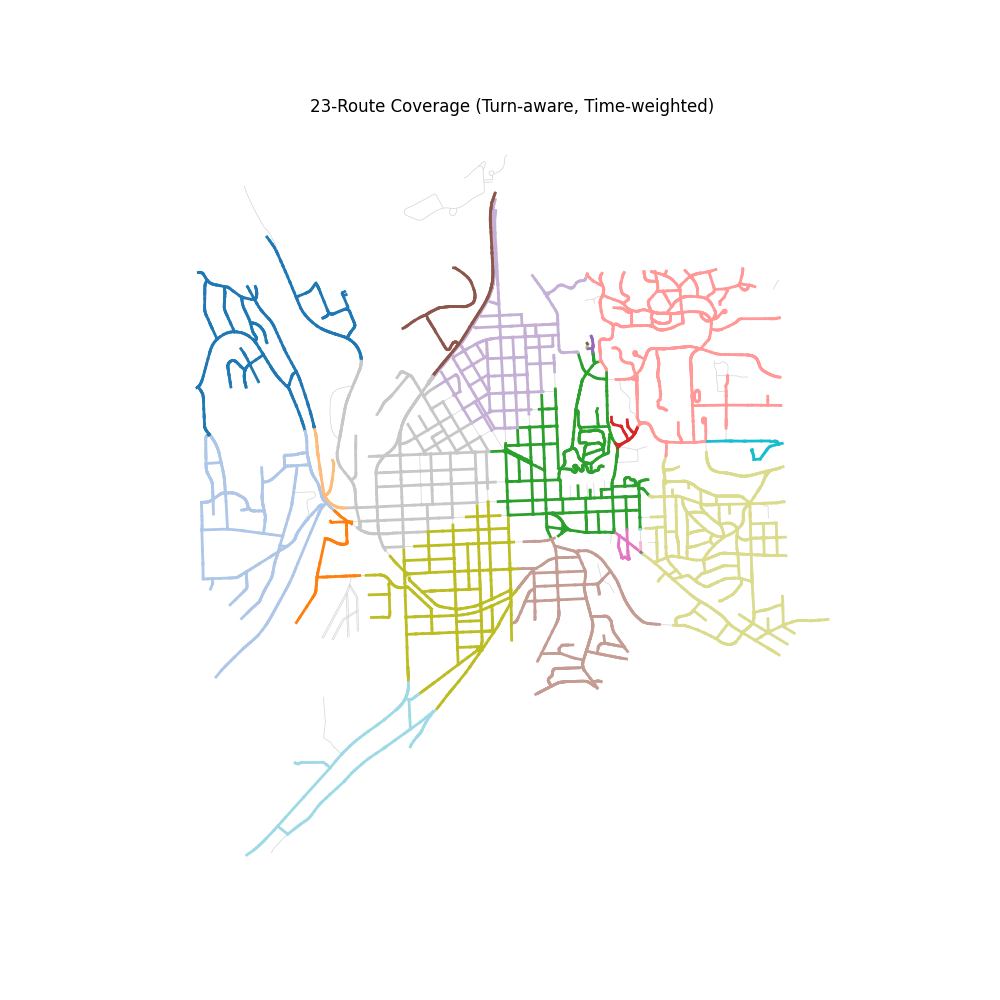

In [21]:
"""
Fast Multi-Vehicle Road Coverage Heuristic (Turn-aware, Time-weighted)
Author: Logan Abramowitz & ChatGPT

Pipeline:
  1. Load road shapefile (GeoPandas).
  2. Filter obvious private/service roads & tiny segments.
  3. Build an undirected NetworkX graph with length/time attributes.
  4. Cluster edges spatially with KMeans, weighted by length/time.
  5. For each cluster & connected component, run an edge-cover DFS
     that prefers straighter continuations (turn penalty).
  6. Plot all routes, each in its own color.
"""

import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
from sklearn.cluster import KMeans
import math
import sys
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sys.setrecursionlimit(20000)

# =====================================================
# 1. BUILD GRAPH FROM SHAPEFILE
# =====================================================

def build_graph(roads):
    """
    Build a NetworkX graph where every edge has:
      - 'length': geometric distance between consecutive points (in CRS units, typically meters)
      - 'time': travel time assuming constant 25 mph (~11.176 m/s)
    """
    G = nx.Graph()
    SPEED_MPS = 25 * 0.44704  # 25 mph = 11.176 m/s

    for _, row in roads.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            lines = [geom]
        elif isinstance(geom, MultiLineString):
            lines = geom.geoms
        else:
            continue

        for line in lines:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                u, v = coords[i], coords[i + 1]
                dist = Point(u).distance(Point(v))
                if dist <= 0:
                    continue
                travel_time = dist / SPEED_MPS
                if G.has_edge(u, v):
                    # keep the shorter/faster version if duplicate edges exist
                    if dist < G[u][v]["length"]:
                        G[u][v]["length"] = dist
                        G[u][v]["time"] = travel_time
                else:
                    G.add_edge(u, v, length=dist, time=travel_time)
    return G


# =====================================================
# 2. FILTER & SIMPLIFY ROADS
# =====================================================

def preprocess_roads(roads):
    """
    Remove private/service/driveway roads if a suitable attribute exists,
    and drop very short segments (< 5 units of length).
    """
    # Try to find a "type/class/access" column
    lowered = {c.lower(): c for c in roads.columns}
    type_like_cols = [orig for low, orig in lowered.items()
                      if any(k in low for k in ["type", "class", "access", "road"])]
    for col in type_like_cols:
        # heuristic filter
        s = roads[col].astype(str).str.lower()
        mask = ~(s.str.contains("private") |
                 s.str.contains("service") |
                 s.str.contains("driveway"))
        roads = roads[mask]
        break  # just use the first matching column

    # Drop very short geometries
    if "geometry" in roads.columns:
        roads = roads[roads.length > 5]

    return roads


# =====================================================
# 3. TURN-AWARE EDGE-COVER DFS
# =====================================================

def turn_alignment(prev, u, v):
    """
    Compute cosine of turn angle at u: prev -> u -> v.
    Higher cosine ~ straighter continuation (small angle).
    """
    if prev is None:
        return 0.0
    ux, uy = u
    px, py = prev
    vx, vy = v

    v_in = np.array([ux - px, uy - py])
    v_out = np.array([vx - ux, vy - uy])
    n1 = np.linalg.norm(v_in)
    n2 = np.linalg.norm(v_out)
    if n1 == 0 or n2 == 0:
        return 0.0
    cosang = float(np.dot(v_in, v_out) / (n1 * n2))
    # Clamp for safety
    return max(-1.0, min(1.0, cosang))


def edge_cover_dfs_turn_aware(G, start):
    """
    Depth-first edge-covering walk:
      - Visits every edge in G at least once.
      - Chooses next edge with preference for straighter direction
        (maximizes turn_alignment cosine).
    Returns:
      route_edges: list of (u, v) edges in traversal order.
    """
    visited_edges = set()   # store undirected edges as sorted tuples
    route_edges = []

    def edge_key(a, b):
        return (a, b) if a <= b else (b, a)

    def dfs(u, prev=None):
        neighbors = list(G.neighbors(u))

        # Build candidate neighbors whose edges are not yet visited
        candidates = []
        for v in neighbors:
            ek = edge_key(u, v)
            if ek in visited_edges:
                continue
            score = turn_alignment(prev, u, v)
            candidates.append((score, v))

        # Prefer straighter continuation: sort by descending score
        candidates.sort(key=lambda x: x[0], reverse=True)

        for score, v in candidates:
            ek = edge_key(u, v)
            if ek in visited_edges:
                continue
            visited_edges.add(ek)
            route_edges.append((u, v))
            dfs(v, prev=u)

    dfs(start)

    # Safety check: if some edges were somehow missed (shouldn't happen),
    # run a quick pass to cover them.
    for (u, v) in G.edges:
        ek = (u, v) if u <= v else (v, u)
        if ek not in visited_edges:
            route_edges.append((u, v))
    return route_edges


# =====================================================
# 4. EDGE-WEIGHTED CLUSTERING & COVERAGE
# =====================================================

def cluster_and_cover_weighted(G, n_clusters=12):
    """
    Cluster edges (by midpoints) using KMeans weighted by edge 'time',
    then for each cluster & its connected components, run the turn-aware
    edge-cover DFS.

    Returns:
      routes: list of list-of-edges (one route per component/cluster)
      node_labels: list of cluster labels parallel to G.nodes for optional plotting
    """
    edges = list(G.edges(data=True))
    if len(edges) == 0:
        return [], []

    pts = []
    weights = []
    for (u, v, data) in edges:
        mx = (u[0] + v[0]) / 2.0
        my = (u[1] + v[1]) / 2.0
        pts.append([mx, my])
        w = float(data.get("time", data.get("length", 1.0)))
        weights.append(w)

    pts = np.array(pts)
    weights = np.array(weights)

    # KMeans on edge midpoints, weighted by travel time
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    edge_labels = kmeans.fit_predict(pts, sample_weight=weights)

    # Convert edge labels -> node labels via majority vote of incident edges
    node_label_votes = {node: {} for node in G.nodes}
    for (u, v, data), lab in zip(edges, edge_labels):
        node_label_votes[u][lab] = node_label_votes[u].get(lab, 0) + 1
        node_label_votes[v][lab] = node_label_votes[v].get(lab, 0) + 1

    node_labels_map = {}
    for node, votes in node_label_votes.items():
        best_lab = max(votes.items(), key=lambda kv: kv[1])[0]
        node_labels_map[node] = best_lab

    # Build clusters of nodes
    clusters = {}
    for node, lab in node_labels_map.items():
        clusters.setdefault(lab, []).append(node)

    routes = []
    node_labels_list = []

    # Build subclusters by connected component instead of raw labels
    for lab, nodes in clusters.items():
        sub_full = G.subgraph(nodes)
        for comp_nodes in nx.connected_components(sub_full):
            compG = sub_full.subgraph(comp_nodes).copy()
            if compG.number_of_edges() == 0:
                continue
            start = next(iter(compG.nodes))
            route_edges = edge_cover_dfs_turn_aware(compG, start)
            routes.append(route_edges)
            for n in compG.nodes:
                node_labels_map[n] = lab  # preserve visual label


    # For plotting: node labels parallel to G.nodes
    node_labels_list = [node_labels_map[node] for node in G.nodes]

    return routes, node_labels_list


# =====================================================
# 5. VISUALIZATION
# =====================================================

def plot_routes(roads, routes):
    """Plot roads and color each route."""
    fig, ax = plt.subplots(figsize=(10, 10))
    roads.plot(ax=ax, color="lightgray", linewidth=0.5)
    cmap = plt.cm.get_cmap("tab20", len(routes))
    for i, route in enumerate(routes):
        for (u, v) in route:
            xs, ys = zip(u, v)
            ax.plot(xs, ys, color=cmap(i), linewidth=2)
    ax.set_axis_off()
    plt.title(f"{len(routes)}-Route Coverage (Turn-aware, Time-weighted)")
    plt.show()


def plot_clusters(G, node_labels):
    """Visualize node clusters only (optional)."""
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = plt.cm.get_cmap("tab20", len(set(node_labels)))
    for (node, label) in zip(G.nodes, node_labels):
        x, y = node
        ax.plot(x, y, "o", color=cmap(label), markersize=1.2)
    plt.title("Spatial Clusters (Edge-weighted KMeans)")
    plt.axis("equal")
    plt.show()


# =====================================================
# 6. MAIN PIPELINE
# =====================================================

def run_fast_coverage(road_file, n_vehicles=12):
    """Run the full improved coverage heuristic on the shapefile."""
    print("📂 Loading roads...")
    roads = gpd.read_file(road_file)
    roads = roads.to_crs(epsg=4326)
    # roads = preprocess_roads(roads)
    print(f"✅ Roads after filtering: {len(roads)} segments")

    print("🔗 Building graph...")
    G = build_graph(roads)
    # Use largest connected component (optional)
    if not nx.is_connected(G):
        G = max((G.subgraph(c) for c in nx.connected_components(G)), key=len).copy()
    print(f"✅ Graph built: {len(G.nodes)} nodes, {len(G.edges)} edges (largest component)")

    print("🚘 Clustering & turn-aware coverage...")
    routes, node_labels = cluster_and_cover_weighted(G, n_clusters=n_vehicles)
    print(f"✅ Generated {len(routes)} routes (some clusters may have multiple components)")

    # Quick coverage sanity check
    covered_edges = set()
    for route in routes:
        for (u, v) in route:
            ek = (u, v) if u <= v else (v, u)
            covered_edges.add(ek)
    all_edges = { (u, v) if u <= v else (v, u) for (u, v) in G.edges }
    print(f"🧮 Edge coverage: {len(covered_edges)}/{len(all_edges)} edges traversed at least once")

    print("🗺️ Plotting routes...")
    plot_routes(roads, routes)
    # plot_clusters(G, node_labels)  # uncomment for debugging clusters

    return G, routes


if __name__ == "__main__":
    # Example usage – adjust to your shapefile path
    run_fast_coverage("Roads/Roads.shp", n_vehicles=10)


📂 Loading roads...
✅ Roads after filtering: 868 segments
🔗 Building graph...
✅ Graph built: 6777 nodes, 7020 edges (largest component)
🚘 Clustering edges & building routes...
✅ Built 10 vehicle routes
🧮 Edge coverage: 7020/7020 edges traversed at least once
🗺️ Plotting routes...


C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2313634822.py:273: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(routes))


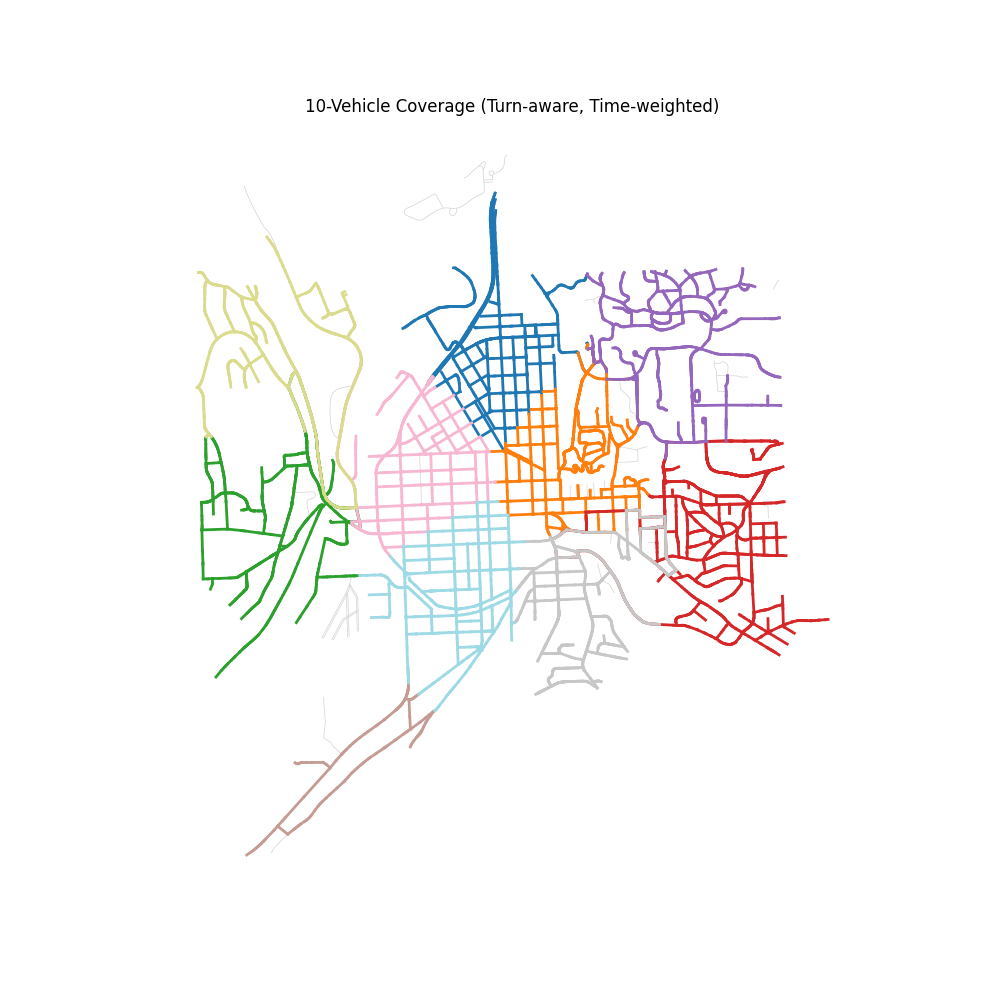

💾 Exporting routes...
✅ Exported 10 non-empty routes to GeoJSON + CSV.
🗺️ Plotting routes...


C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2313634822.py:273: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(routes))


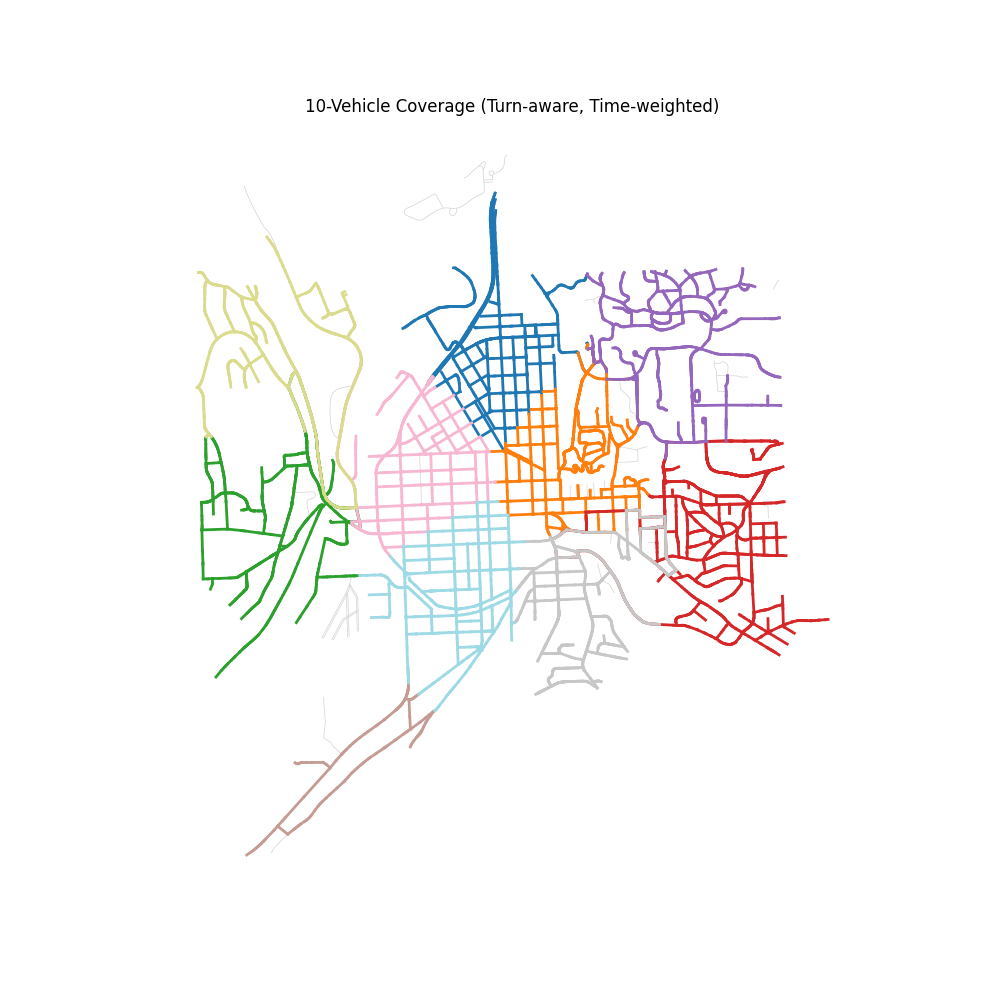

💾 Exporting routes...
✅ Exported 10 non-empty routes to GeoJSON + CSV.
🧭 Creating human-readable directions...
🧭 Generating readable directions from OSRM...
❌ Error fetching directions for route 0: 414 Client Error: Request-URI Too Large for url: http://router.project-osrm.org/route/v1/driving/-76.49204469667156,42.45159372149392;-76.4920317993516,42.45154431761753;-76.49204469667156,42.45159372149392;-76.49207821961578,42.45163388048947;-76.49204469667156,42.45159372149392;-76.4920317993516,42.45154431761753;-76.49203904475763,42.45149921697261;-76.4920520792886,42.45145412183733;-76.49206488185291,42.45140885455977;-76.49207513080134,42.451368215447914;-76.49207288013706,42.45132327919478;-76.4920418989746,42.45128758136489;-76.49198703139133,42.451274846241816;-76.49158378006483,42.451311569391365;-76.49158379978661,42.451311383947015;-76.49159176476088,42.45123491233792;-76.49158743075543,42.45118997440685;-76.49157732620831,42.45113148246507;-76.49156745240947,42.45107316266225;-7

C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2313634822.py:396: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))
C:\Users\logan\AppData\Local\Temp\ipykernel_4640\2313634822.py:398: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", len(routes))


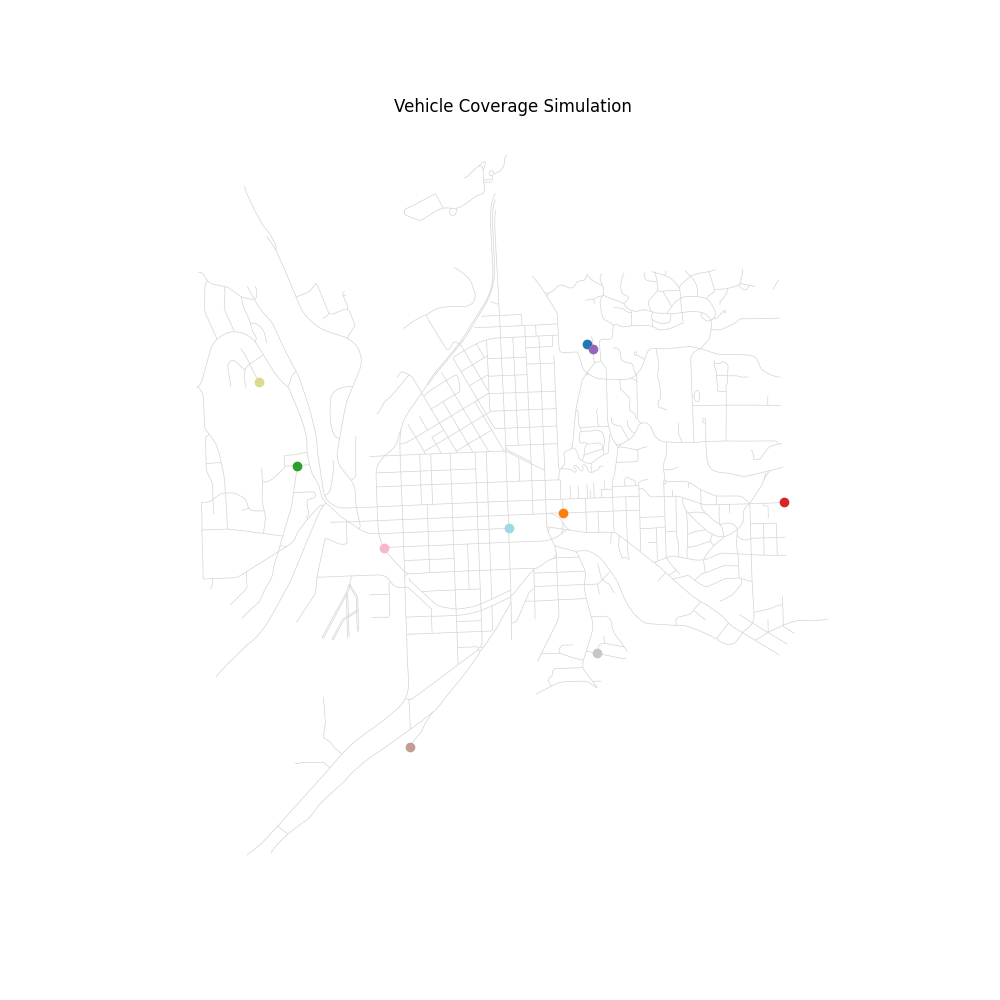

In [ ]:
"""
Fast Multi-Vehicle Road Coverage Heuristic (Turn-aware, Time-weighted, Fixed #Vehicles)

- Constant 25 mph speed cap (time = length / 25 mph)
- Each edge assigned to one of N vehicles via KMeans on edge midpoints, weighted by time
- For each vehicle:
    * Build subgraph of its edges
    * If subgraph has multiple components, stitch them via shortest paths in full graph
    * Within each component, run a turn-aware edge-cover DFS
- Ensures every edge in the largest connected component is covered at least once
- Exports routes and supports simple multi-vehicle animation
"""
%matplotlib widget
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
import json
import csv
import math
import sys
import warnings
import requests

warnings.filterwarnings("ignore", category=UserWarning)
sys.setrecursionlimit(20000)

# =====================================================
# 1. BUILD GRAPH FROM SHAPEFILE (25 mph constant)
# =====================================================

def build_graph(roads):
    """
    Build a NetworkX graph where every edge has:
      - 'length': geometric distance between consecutive points (in CRS units, ideally meters)
      - 'time': travel time assuming constant 25 mph (~11.176 m/s)
    """
    G = nx.Graph()
    SPEED_MPS = 25 * 0.44704  # 25 mph = 11.176 m/s

    for _, row in roads.iterrows():
        geom = row.geometry
        if isinstance(geom, LineString):
            lines = [geom]
        elif isinstance(geom, MultiLineString):
            lines = geom.geoms
        else:
            continue

        for line in lines:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                u, v = coords[i], coords[i + 1]
                dist = Point(u).distance(Point(v))
                if dist <= 0:
                    continue
                travel_time = dist / SPEED_MPS
                if G.has_edge(u, v):
                    # keep the shorter/faster version if duplicate edges exist
                    if dist < G[u][v]["length"]:
                        G[u][v]["length"] = dist
                        G[u][v]["time"] = travel_time
                else:
                    G.add_edge(u, v, length=dist, time=travel_time)
    return G


# =====================================================
# 2. FILTER & SIMPLIFY ROADS
# =====================================================

def preprocess_roads(roads):
    """
    Remove private/service/driveway roads if a suitable attribute exists,
    and drop very short segments (< 5 units of length).
    """
    lowered = {c.lower(): c for c in roads.columns}
    type_like_cols = [orig for low, orig in lowered.items()
                      if any(k in low for k in ["type", "class", "access", "road"])]
    for col in type_like_cols:
        s = roads[col].astype(str).str.lower()
        mask = ~(s.str.contains("private") |
                 s.str.contains("service") |
                 s.str.contains("driveway"))
        roads = roads[mask]
        break  # just use the first matching column

    if "geometry" in roads.columns:
        roads = roads[roads.length > 5]

    return roads


# =====================================================
# 3. TURN-AWARE EDGE-COVER DFS (within a component)
# =====================================================

def turn_alignment(prev, u, v):
    """
    Compute cosine of turn angle at u: prev -> u -> v.
    Higher cosine ~ straighter continuation (smaller angle).
    """
    if prev is None:
        return 0.0
    ux, uy = u
    px, py = prev
    vx, vy = v

    v_in = np.array([ux - px, uy - py])
    v_out = np.array([vx - ux, vy - uy])
    n1 = np.linalg.norm(v_in)
    n2 = np.linalg.norm(v_out)
    if n1 == 0 or n2 == 0:
        return 0.0
    cosang = float(np.dot(v_in, v_out) / (n1 * n2))
    return max(-1.0, min(1.0, cosang))


def edge_cover_dfs_turn_aware(G_sub, start):
    """
    Depth-first edge-covering walk:
      - Visits every edge in G_sub at least once.
      - Chooses next edge with preference for straighter direction
        (maximizes turn_alignment cosine).
    Returns:
      route_edges: list of (u, v) edges in traversal order.
    """
    visited_edges = set()   # undirected edges as sorted tuples
    route_edges = []

    def edge_key(a, b):
        return (a, b) if a <= b else (b, a)

    def dfs(u, prev=None):
        neighbors = list(G_sub.neighbors(u))

        # Candidate neighbors with unvisited edges
        candidates = []
        for v in neighbors:
            ek = edge_key(u, v)
            if ek in visited_edges:
                continue
            score = turn_alignment(prev, u, v)
            candidates.append((score, v))

        # Prefer straighter continuation
        candidates.sort(key=lambda x: x[0], reverse=True)

        for score, v in candidates:
            ek = edge_key(u, v)
            if ek in visited_edges:
                continue
            visited_edges.add(ek)
            route_edges.append((u, v))
            dfs(v, prev=u)

    dfs(start)

    # Safety pass (should rarely add anything)
    for (u, v) in G_sub.edges:
        ek = (u, v) if u <= v else (v, u)
        if ek not in visited_edges:
            route_edges.append((u, v))

    return route_edges


# =====================================================
# 4. CLUSTER EDGES & BUILD EXACTLY N VEHICLE ROUTES
# =====================================================

def cluster_and_build_routes(G, n_vehicles=10):
    """
    - Assign each edge to one of n_vehicles with KMeans on edge midpoints, weighted by 'time'.
    - For each vehicle k:
        * Build a subgraph H_k of its edges.
        * If H_k has multiple components, traverse them one by one and
          stitch them with shortest paths in the full graph G.
        * Within each component, use edge_cover_dfs_turn_aware.
    - Returns: list of routes (one per vehicle), where each route is a list of (u, v) edges.
    """
    edges = list(G.edges(data=True))
    if not edges:
        return []

    # Edge midpoints & weights
    pts = []
    weights = []
    for (u, v, data) in edges:
        mx = (u[0] + v[0]) / 2.0
        my = (u[1] + v[1]) / 2.0
        pts.append([mx, my])
        w = float(data.get("time", data.get("length", 1.0)))
        weights.append(w)
    pts = np.array(pts)
    weights = np.array(weights)

    # KMeans: each cluster ID corresponds to a vehicle
    kmeans = KMeans(n_clusters=n_vehicles, n_init=10, random_state=0)
    edge_labels = kmeans.fit_predict(pts, sample_weight=weights)

    # Group edges by vehicle
    vehicle_edges = {k: [] for k in range(n_vehicles)}
    for (u, v, data), lab in zip(edges, edge_labels):
        vehicle_edges[lab].append((u, v, data))

    routes = []

    for k in range(n_vehicles):
        veh_edges = vehicle_edges[k]
        if not veh_edges:
            routes.append([])  # empty route (unlikely)
            continue

        # Build subgraph H_k with only this vehicle's edges
        H = nx.Graph()
        for (u, v, data) in veh_edges:
            H.add_edge(u, v, **data)

        # For each connected component in H, cover edges and stitch
        components = list(nx.connected_components(H))
        vehicle_route = []
        prev_end = None

        for comp_nodes in components:
            compG = H.subgraph(comp_nodes).copy()
            if compG.number_of_edges() == 0:
                continue

            # Pick a start node for this component
            if prev_end is None:
                start = next(iter(compG.nodes))
            else:
                # Connect previous end to this component via shortest path in full G
                try:
                    # Pick closest node in this component (by time distance)
                    dist = nx.single_source_dijkstra_path_length(G, prev_end, weight="time")
                    reachable = [n for n in comp_nodes if n in dist]
                    if reachable:
                        start = min(reachable, key=lambda n: dist[n])
                    else:
                        start = next(iter(compG.nodes))

                    connector_path = nx.shortest_path(G, prev_end, start, weight="time")
                    for a, b in zip(connector_path[:-1], connector_path[1:]):
                        vehicle_route.append((a, b))
                except nx.NetworkXNoPath:
                    # If somehow disconnected in G, just start fresh
                    start = next(iter(compG.nodes))

            # Now cover edges within this component turn-aware
            comp_route = edge_cover_dfs_turn_aware(compG, start)
            vehicle_route.extend(comp_route)
            if vehicle_route:
                prev_end = vehicle_route[-1][1]

        routes.append(vehicle_route)

    return routes


# =====================================================
# 5. VISUALIZATION
# =====================================================

def plot_routes(roads, routes):
    """Plot roads and color each vehicle's route."""
    fig, ax = plt.subplots(figsize=(10, 10))
    roads.plot(ax=ax, color="lightgray", linewidth=0.5)
    cmap = plt.cm.get_cmap("tab20", len(routes))
    for i, route in enumerate(routes):
        for (u, v) in route:
            xs, ys = zip(u, v)
            ax.plot(xs, ys, color=cmap(i), linewidth=2)
    ax.set_axis_off()
    plt.title(f"{len(routes)}-Vehicle Coverage (Turn-aware, Time-weighted)")
    plt.show()


# =====================================================
# 6. EXPORT ROUTES (GeoJSON + CSV)
# =====================================================

def export_routes(routes, filename_prefix="routes"):
    """Export each route as GeoJSON and CSV for simulation."""
    geojson_features = []

    for i, route in enumerate(routes):
        if not route:
            continue
        coords = []
        for (u, v) in route:
            coords.append(u)
            coords.append(v)
        # Deduplicate consecutive points
        cleaned = [coords[0]]
        for pt in coords[1:]:
            if pt != cleaned[-1]:
                cleaned.append(pt)

        geojson_features.append({
            "type": "Feature",
            "geometry": {"type": "LineString", "coordinates": cleaned},
            "properties": {"vehicle_id": i}
        })

        # CSV per vehicle
        with open(f"routes/{filename_prefix}_{i}.csv", "w", newline="") as f:
            writer = csv.writer(f)
            writer.writerow(["x", "y"])
            writer.writerows(cleaned)

    geojson = {"type": "FeatureCollection", "features": geojson_features}
    with open(f"routes/{filename_prefix}.geojson", "w") as f:
        json.dump(geojson, f)

    print(f"✅ Exported {len(geojson_features)} non-empty routes to GeoJSON + CSV.")


# =====================================================
#  7. GENERATE READABLE ROUTES
# =====================================================

def generate_readable_directions(routes, filename_prefix="routes_directions"):
    """
    For each route, use OSRM (OpenStreetMap routing) to generate
    readable step-by-step driving directions and export to text + CSV.
    """
    print("🧭 Generating readable directions from OSRM...")

    for i, route in enumerate(routes):
        if not route:
            continue

        # Flatten to coordinate sequence
        coords = []
        for (u, v) in route:
            coords.append(u)
            coords.append(v)
        cleaned = [coords[0]]
        for pt in coords[1:]:
            if pt != cleaned[-1]:
                cleaned.append(pt)

        # OSRM expects 'lon,lat' format
        coords_str = ";".join([f"{x},{y}" for x, y in cleaned])

        try:
            r = requests.get(
                f"http://router.project-osrm.org/route/v1/driving/{coords_str}",
                params={"overview": "false", "steps": "true"}
            )
            r.raise_for_status()
            data = r.json()

            if not data["routes"]:
                print(f"⚠️ No route found for vehicle {i}")
                continue

            steps = data["routes"][0]["legs"][0]["steps"]
            directions = []
            for s in steps:
                instr = s["maneuver"].get("instruction", "")
                name = s.get("name", "")
                dist = round(s.get("distance", 0) / 1609.34, 2)  # miles
                time_min = round(s.get("duration", 0) / 60, 1)
                directions.append([instr, name, dist, time_min])

            # Write text version
            with open(f"routes/{filename_prefix}_{i}.txt", "w", encoding="utf-8") as f:
                f.write(f"Route {i+1} Directions:\n\n")
                for step in directions:
                    instr, name, dist, time_min = step
                    f.write(f"- {instr} ({dist} mi, {time_min} min)\n")

            # Write CSV version
            with open(f"routes/{filename_prefix}_{i}.csv", "w", newline="", encoding="utf-8") as f:
                writer = csv.writer(f)
                writer.writerow(["Instruction", "Street Name", "Distance (mi)", "Time (min)"])
                writer.writerows(directions)

            print(f"✅ Route {i+1}: {len(directions)} steps written")

        except Exception as e:
            print(f"❌ Error fetching directions for route {i}: {e}")

# =====================================================
# 8. SIMPLE MULTI-VEHICLE ANIMATION
# =====================================================

def animate_routes(routes, roads, interval=50):
    """Animate vehicles moving along their routes."""
    fig, ax = plt.subplots(figsize=(10, 10))
    roads.plot(ax=ax, color="lightgray", linewidth=0.5)
    cmap = plt.cm.get_cmap("tab20", len(routes))

    # Build coordinate sequences per route
    route_coords = []
    for route in routes:
        if not route:
            route_coords.append([(0, 0)])
            continue
        coords = []
        for (u, v) in route:
            coords.append(u)
            coords.append(v)
        cleaned = [coords[0]]
        for pt in coords[1:]:
            if pt != cleaned[-1]:
                cleaned.append(pt)
        route_coords.append(cleaned)

    cars = []
    for i, coords in enumerate(route_coords):
        (x0, y0) = coords[0]
        car, = ax.plot(x0, y0, "o", color=cmap(i), markersize=6)
        cars.append(car)

    ax.set_axis_off()
    plt.title("Vehicle Coverage Simulation")

    n_frames = max(len(c) for c in route_coords)

    def update(frame):
        for i, car in enumerate(cars):
            coords = route_coords[i]
            idx = frame % len(coords)
            x, y = coords[idx]
            car.set_data(x, y)
        return cars

    ani = FuncAnimation(fig, update, frames=n_frames, interval=interval, blit=True)
    plt.show()
    return ani


# =====================================================
# 9. MAIN PIPELINE
# =====================================================

def run_fast_coverage(road_file, n_vehicles=10):
    """Run the full coverage heuristic on the shapefile."""
    print("📂 Loading roads...")
    roads = gpd.read_file(road_file)
    # For more accurate distances, consider using a metric CRS like EPSG:3857 instead
    roads = roads.to_crs(epsg=4326)
    # roads = preprocess_roads(roads)
    print(f"✅ Roads after filtering: {len(roads)} segments")

    print("🔗 Building graph...")
    G = build_graph(roads)
    if not nx.is_connected(G):
        G = max((G.subgraph(c) for c in nx.connected_components(G)), key=len).copy()
    print(f"✅ Graph built: {len(G.nodes)} nodes, {len(G.edges)} edges (largest component)")

    print("🚘 Clustering edges & building routes...")
    routes = cluster_and_build_routes(G, n_vehicles=n_vehicles)
    print(f"✅ Built {len(routes)} vehicle routes")

    # Coverage check
    covered_edges = set()
    for route in routes:
        for (u, v) in route:
            ek = (u, v) if u <= v else (v, u)
            covered_edges.add(ek)
    all_edges = {(u, v) if u <= v else (v, u) for (u, v) in G.edges}
    print(f"🧮 Edge coverage: {len(covered_edges)}/{len(all_edges)} edges traversed at least once")

    print("🗺️ Plotting routes...")
    plot_routes(roads, routes)

    print("💾 Exporting routes...")
    export_routes(routes, "route")

    print("🧭 Creating human-readable directions...")
    generate_readable_directions(routes, "routes_directions")


    # Optional: animate (comment out if too heavy)
    animate_routes(routes, roads, interval=50)

    return G, roads, routes


if __name__ == "__main__":
    # Change this to your actual shapefile path
    run_fast_coverage("Roads/Roads.shp", n_vehicles=10)
